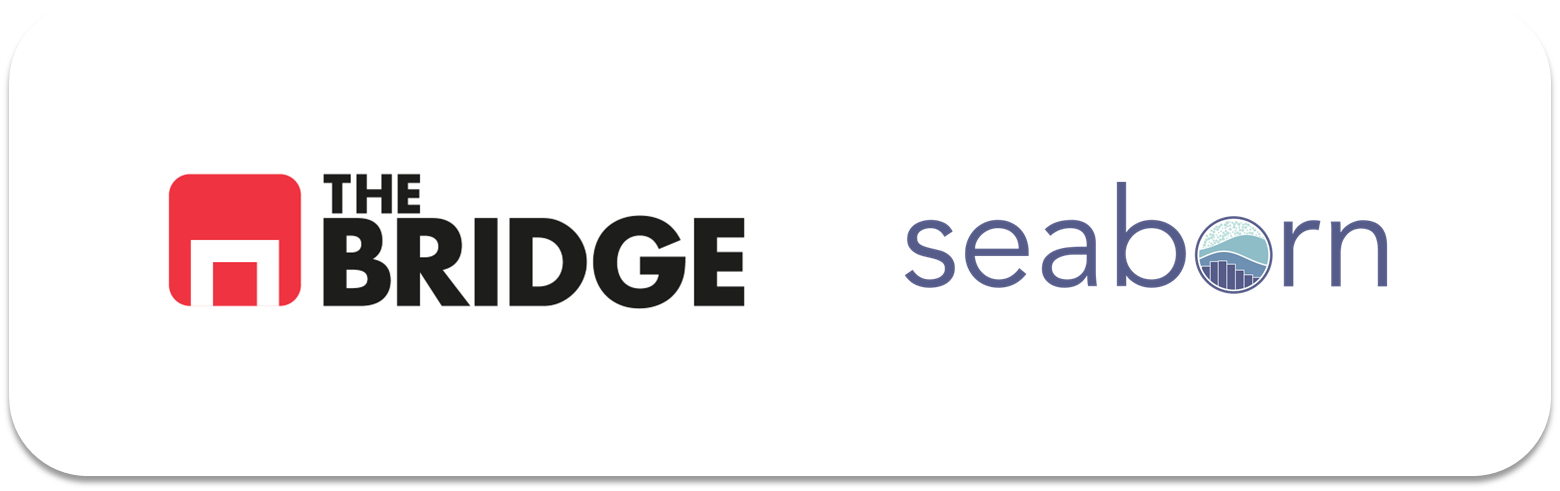

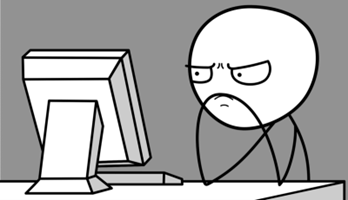

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [74]:
titanicDF = pd.read_csv("./data/titanic.csv")
bitcoinDF = pd.read_csv("./data/BTC.csv")
viajesDF = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [75]:
bitcoinDF['fechas'] = pd.to_datetime(bitcoinDF['date'])

In [78]:
bitcoinDF.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,fechas
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022-03-01
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022-02-28
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022-02-27
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022-02-26
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022-02-25


In [79]:
bitcoinDF.set_index('fechas', drop=True, inplace=True)

In [73]:
bitcoinDF.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


### Ejercicio 2

Crea una función a la que puedas pasar como argumentos un dataframe y una lista de columnas categóricas y dibuje una matriz de gráficas de 2 columnas y tantas filas como necesite para pintar el diagrama de barras de las frecuencias absolutas de las columnas pasadas como argumento. No hace falta que compruebes que las columnas son categóricas. Y que ponga como título de cada figura "Frecuencias Absolutas de \<nombre de la columna>\. Utiliza Seaborn para dibujar las gráficas y matplotlib para lo que necesites (pero no para dibujar las gráficas)

In [34]:
titanicDF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [42]:
def draw_counts(df, categoric_vars):
    rows = (len(categoric_vars) + 1) // 2
    fig,axs = plt.subplots(nrows = rows, ncols=2, figsize=(10,4 * rows))

    for i, col in enumerate(categoric_vars):
        row = i // 2
        col_posi = i % 2
        sns.countplot(x=col, data=df, ax=axs[row, col_posi], hue=col, legend=False)
        axs[row, col_posi].set_title(f"Frecuencias Absolutas de {col}")

    if len(categoric_vars) % 2 != 0:
        fig.delaxes(axs[-1,-1])
        
    fig.suptitle("Frecuencias Absolutas de Variables Categoricas en")
    plt.subplots_adjust(hspace=0.3)
    

### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


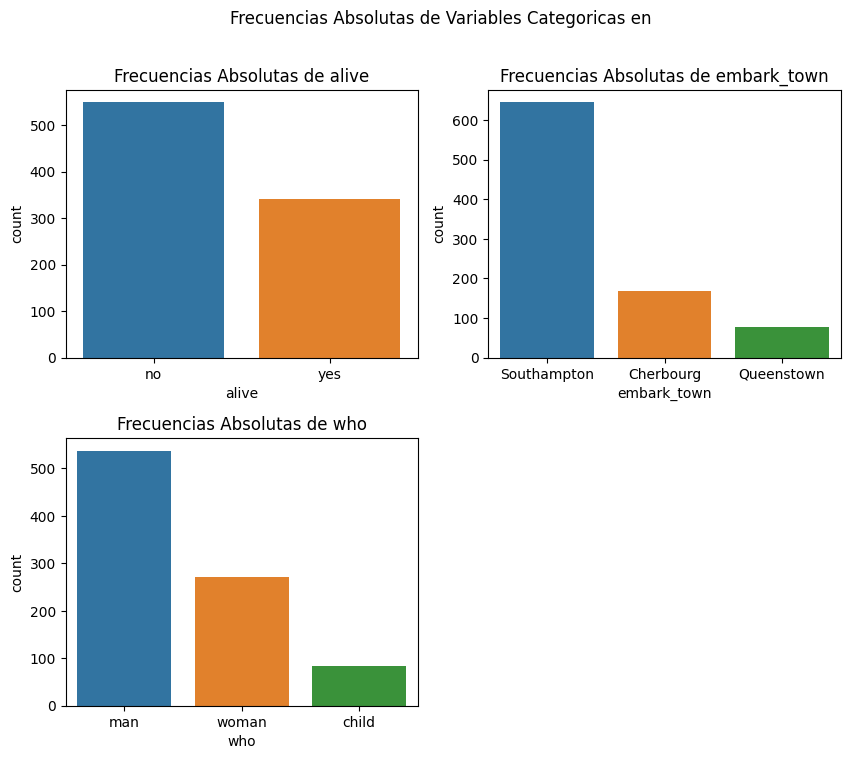

In [43]:
draw_counts(titanicDF, ['alive','embark_town','who'])

### Ejercicio 4

Crea una función similar a la del ejercicio 4, pero que esta vez pinte el histograma de una lista de columnas numéricas, añade un argumento para poder indicar el número de bins. Añade también un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [61]:
def draw_histograms(df, numeric_vars, kde=True, bins=100):
    rows = (len(numeric_vars) + 1) // 2
    fig,axs = plt.subplots(nrows = rows, ncols=2, figsize=(10,4 * rows))

    for i, col in enumerate(numeric_vars):
        row = i // 2
        col_posi = i % 2
        sns.histplot(df[col], kde=kde, bins=bins, ax=axs[row, col_posi])
        axs[row, col_posi].set_title(f"Histograma de {col}")

    if len(numeric_vars) % 2 != 0:
        fig.delaxes(axs[-1,-1])

    plt.subplots_adjust(hspace=0.3)

### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

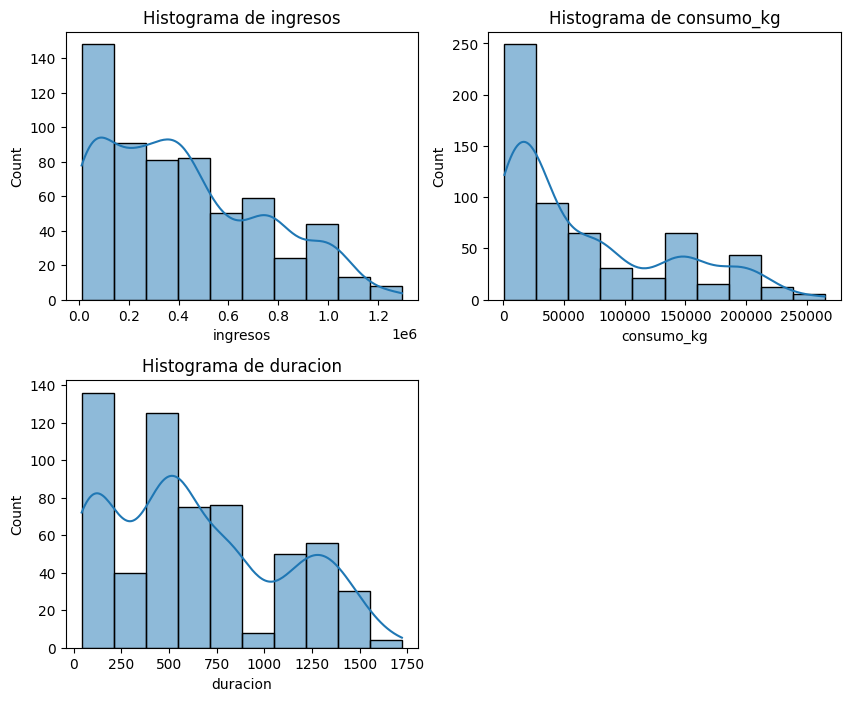

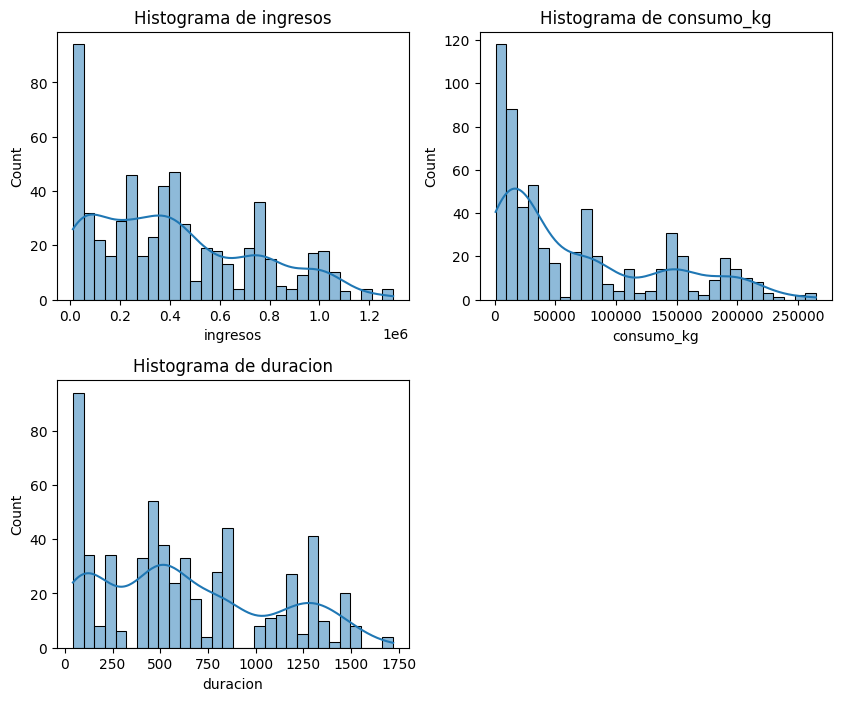

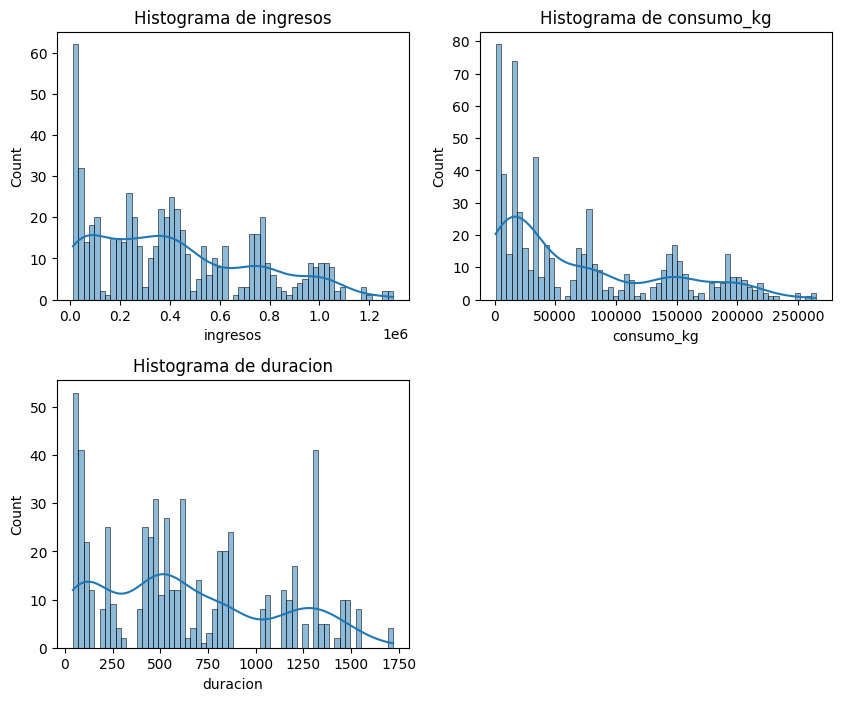

In [63]:
bins = [10,30,60]
for bin in bins:
    draw_histograms(viajesDF, ['ingresos','consumo_kg','duracion'], bins=bin)

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [66]:
def time_series(df, numeric_cols):
    rows = (len(numeric_cols) + 1) // 2
    fig,axs = plt.subplots(nrows = rows, ncols=2, figsize=(10,4 * rows))

    for i, col in enumerate(numeric_cols):
        row = i // 2
        col_posi = i % 2
        sns.lineplot(x=df.index, y=col, data=df ,ax=axs[row, col_posi])
        axs[row, col_posi].set_title(f"lineplot de {col}")

    if len(numeric_cols) % 2 != 0:
        fig.delaxes(axs[-1,-1])

    plt.subplots_adjust(hspace=0.3)

### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

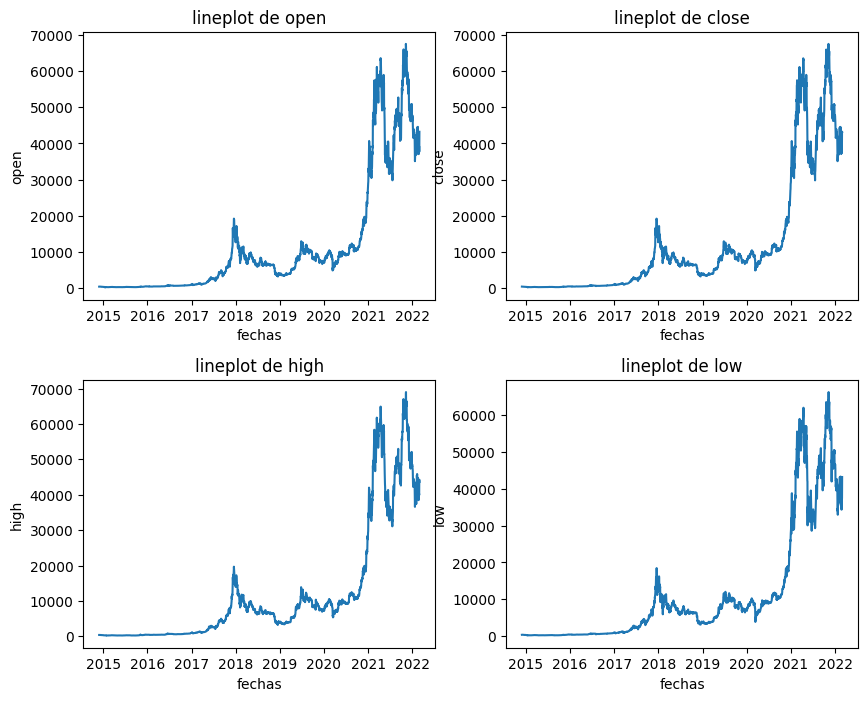

In [82]:
time_series(bitcoinDF, ['open','close','high','low'])

### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

In [105]:

def time_series(df, numeric_cols, combined=False, start=None, end=None):
    if start is not None:
        start = pd.to_datetime(start)
    if end is not None:
        end = pd.to_datetime(end)
    
    if start is not None and end is not None:
        df = df.loc[end:start]
    elif start is not None:
        df = df.loc[:start]
    elif end is not None:
        df = df.loc[end:]
    
    rows = (len(numeric_cols) + 1) // 2

    if combined:
        plt.figure(figsize=(10,6))
        for col in numeric_cols:
            sns.lineplot(x=df.index, y=df[col], label=col)
        plt.title('Combined plot')
        plt.legend()
        plt.xlabel("Date")
        plt.ylabel("Values")
    else:
        fig,axs = plt.subplots(nrows = rows, ncols=2, figsize=(10,4 * rows))
        axs = axs.flatten()

        for i, col in enumerate(numeric_cols):
            sns.lineplot(x=df.index, y=col, data=df ,ax=axs[i])
            axs[i].set_title(f"lineplot de {col}")
            axs[i].set_xlabel("Date")
            axs[i].set_ylabel("Values")

        if len(numeric_cols) % 2 != 0:
            fig.delaxes(axs[-1,-1])

    plt.subplots_adjust(hspace=0.3)

### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.

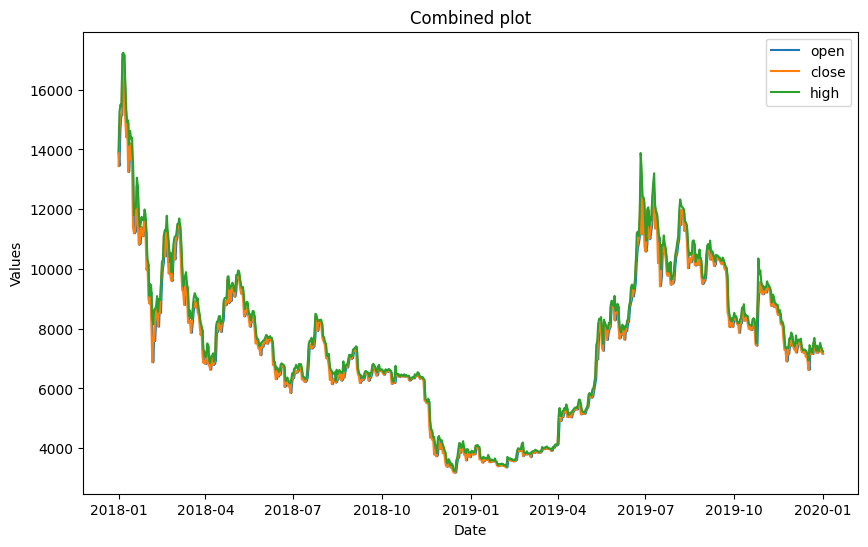

In [113]:
time_series(bitcoinDF, ['open','close','high'], combined=True, start='2018', end='2020')


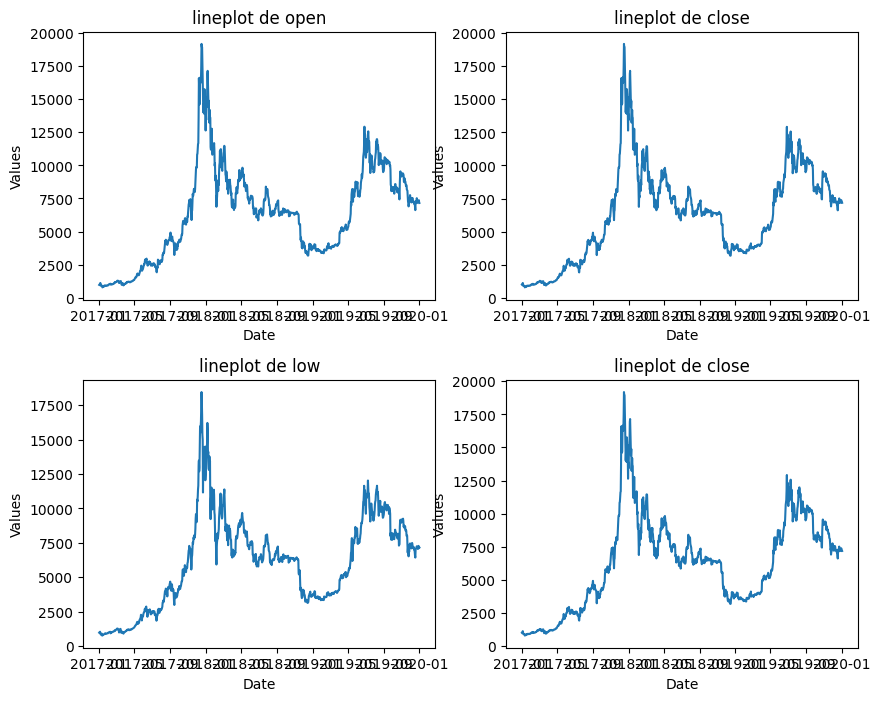

In [112]:
time_series(bitcoinDF, ['open','close','low','close'], combined=False, start='2017', end='2020')
